In [1]:
import numpy  as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from   sklearn.linear_model  import LinearRegression #线性回归
import sklearn.datasets as datasets#自带数据

In [2]:
diabetes=datasets.load_diabetes() #糖尿病数据
diabetes #预览数据

{'DESCR': 'Diabetes dataset\n================\n\nNotes\n-----\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\nData Set Characteristics:\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attributes:\n    :Age:\n    :Sex:\n    :Body mass index:\n    :Average blood pressure:\n    :S1:\n    :S2:\n    :S3:\n    :S4:\n    :S5:\n    :S6:\n\nNote: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).\n\nSource URL:\nhttp://www4.stat.ncsu.edu/~boos/var.select/diabetes.html\n\nFor more information see:\nB

In [5]:
x=diabetes.data #糖尿病的描述数据
x.shape
x

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ..., 
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [8]:
y=diabetes.target
y.shape
y

array([ 151.,   75.,  141.,  206.,  135.,   97.,  138.,   63.,  110.,
        310.,  101.,   69.,  179.,  185.,  118.,  171.,  166.,  144.,
         97.,  168.,   68.,   49.,   68.,  245.,  184.,  202.,  137.,
         85.,  131.,  283.,  129.,   59.,  341.,   87.,   65.,  102.,
        265.,  276.,  252.,   90.,  100.,   55.,   61.,   92.,  259.,
         53.,  190.,  142.,   75.,  142.,  155.,  225.,   59.,  104.,
        182.,  128.,   52.,   37.,  170.,  170.,   61.,  144.,   52.,
        128.,   71.,  163.,  150.,   97.,  160.,  178.,   48.,  270.,
        202.,  111.,   85.,   42.,  170.,  200.,  252.,  113.,  143.,
         51.,   52.,  210.,   65.,  141.,   55.,  134.,   42.,  111.,
         98.,  164.,   48.,   96.,   90.,  162.,  150.,  279.,   92.,
         83.,  128.,  102.,  302.,  198.,   95.,   53.,  134.,  144.,
        232.,   81.,  104.,   59.,  246.,  297.,  258.,  229.,  275.,
        281.,  179.,  200.,  200.,  173.,  180.,   84.,  121.,  161.,
         99.,  109.,

In [9]:
x

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ..., 
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [10]:
x=x[:,np.newaxis,2] #新建一个轴，拆分数据
x

array([[ 0.06169621],
       [-0.05147406],
       [ 0.04445121],
       [-0.01159501],
       [-0.03638469],
       [-0.04069594],
       [-0.04716281],
       [-0.00189471],
       [ 0.06169621],
       [ 0.03906215],
       [-0.08380842],
       [ 0.01750591],
       [-0.02884001],
       [-0.00189471],
       [-0.02560657],
       [-0.01806189],
       [ 0.04229559],
       [ 0.01211685],
       [-0.0105172 ],
       [-0.01806189],
       [-0.05686312],
       [-0.02237314],
       [-0.00405033],
       [ 0.06061839],
       [ 0.03582872],
       [-0.01267283],
       [-0.07734155],
       [ 0.05954058],
       [-0.02129532],
       [-0.00620595],
       [ 0.04445121],
       [-0.06548562],
       [ 0.12528712],
       [-0.05039625],
       [-0.06332999],
       [-0.03099563],
       [ 0.02289497],
       [ 0.01103904],
       [ 0.07139652],
       [ 0.01427248],
       [-0.00836158],
       [-0.06764124],
       [-0.0105172 ],
       [-0.02345095],
       [ 0.06816308],
       [-0

In [13]:
x=x[:,0].reshape((442,1))
x

array([[ 0.06169621],
       [-0.05147406],
       [ 0.04445121],
       [-0.01159501],
       [-0.03638469],
       [-0.04069594],
       [-0.04716281],
       [-0.00189471],
       [ 0.06169621],
       [ 0.03906215],
       [-0.08380842],
       [ 0.01750591],
       [-0.02884001],
       [-0.00189471],
       [-0.02560657],
       [-0.01806189],
       [ 0.04229559],
       [ 0.01211685],
       [-0.0105172 ],
       [-0.01806189],
       [-0.05686312],
       [-0.02237314],
       [-0.00405033],
       [ 0.06061839],
       [ 0.03582872],
       [-0.01267283],
       [-0.07734155],
       [ 0.05954058],
       [-0.02129532],
       [-0.00620595],
       [ 0.04445121],
       [-0.06548562],
       [ 0.12528712],
       [-0.05039625],
       [-0.06332999],
       [-0.03099563],
       [ 0.02289497],
       [ 0.01103904],
       [ 0.07139652],
       [ 0.01427248],
       [-0.00836158],
       [-0.06764124],
       [-0.0105172 ],
       [-0.02345095],
       [ 0.06816308],
       [-0

In [14]:
x.shape

(442, 1)

In [15]:
x_train=x[:-20]
x_test=x[-20:]
y_train=y[:-20]
y_test=y[-20:]  #抽取训练数据以及预测数据

In [16]:
lrg=LinearRegression() #创建线性回归模型

In [17]:
lrg.fit(x_train,y_train)#训练

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
y_new=lrg.predict(x_test) #预测结果

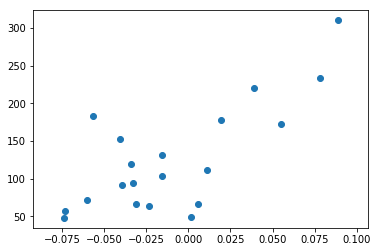

In [20]:
plt.scatter(x_test,y_test)

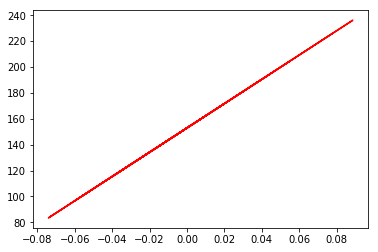

In [21]:
plt.plot(x_test,y_new,"r")

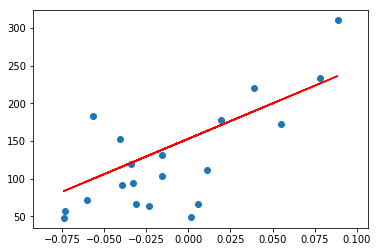

In [22]:
plt.scatter(x_test,y_test)
plt.plot(x_test,y_new,"r")